In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
os.listdir('D:\Projects\Kaggle\ASHRAE')

['.git',
 '.ipynb_checkpoints',
 'ASHRAE_Exploration.ipynb',
 'building_metadata.csv',
 'sample_submission.csv',
 'test.csv',
 'train.csv',
 'weather_test.csv',
 'weather_train.csv']

In [3]:
building_metadata_df = pd.read_csv('building_metadata.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
weather_train_df = pd.read_csv('weather_train.csv')
weather_test_df = pd.read_csv('weather_test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
weather_train_df['timestamp'] = pd.to_datetime(weather_train_df['timestamp'])
print(train_df.shape)
train_df.head()

(20216100, 4)


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [5]:
print(weather_train_df.shape)
weather_train_df.head()

(139773, 9)


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [6]:
print(building_metadata_df.shape)
building_metadata_df.head()

(1449, 6)


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [7]:
os.listdir('D:\Projects\Kaggle\ASHRAE')

['.git',
 '.ipynb_checkpoints',
 'ASHRAE_Exploration.ipynb',
 'building_metadata.csv',
 'sample_submission.csv',
 'test.csv',
 'train.csv',
 'weather_test.csv',
 'weather_train.csv']

In [8]:
# memory reduction?

#### Attempt at EDM:

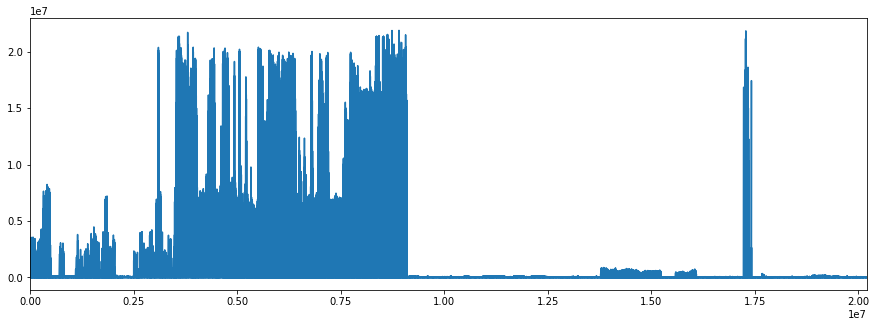

In [9]:
plt.figure(figsize = (15,5))
train_df['meter_reading'].plot()

#### Missing values:

In [10]:
total = train_df.isnull().sum().sort_values(ascending = False)
percent = (train_df.isnull().sum()/train_df.isnull().count()*100).sort_values(ascending = False)
missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__train_data.head()

,Total,Percent
meter_reading,0,0.0
timestamp,0,0.0
meter,0,0.0
building_id,0,0.0


In [11]:
total = weather_train_df.isnull().sum().sort_values(ascending = False)
percent = (weather_train_df.isnull().sum()/weather_train_df.isnull().count()*100).sort_values(ascending = False)
missing__weather_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__weather_train_data.head()

,Total,Percent
cloud_coverage,69173,49.489529
precip_depth_1_hr,50289,35.979052
sea_level_pressure,10618,7.596603
wind_direction,6268,4.484414
wind_speed,304,0.217496


In [12]:
total = building_metadata_df.isnull().sum().sort_values(ascending = False)
percent = (building_metadata_df.isnull().sum()/building_metadata_df.isnull().count()*100).sort_values(ascending = False)
missing__building_metadata_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__building_metadata_data.head()

,Total,Percent
floor_count,1094,75.500345
year_built,774,53.416149
square_feet,0,0.000000
primary_use,0,0.000000
building_id,0,0.000000


#### Correlations:

In [13]:
correlations = train_df.corr()
correlations.head()

,building_id,meter,meter_reading
building_id,1.000000,0.222268,0.008761
meter,0.222268,1.000000,0.017672
meter_reading,0.008761,0.017672,1.000000


In [14]:
print(train_df['building_id'].nunique())
print(test_df['building_id'].nunique())

1449
1449


In [15]:
def plot_dist_col(column):
    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(weather_train_df[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    sns.distplot(weather_test_df[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['train', 'test'])
    plt.show()

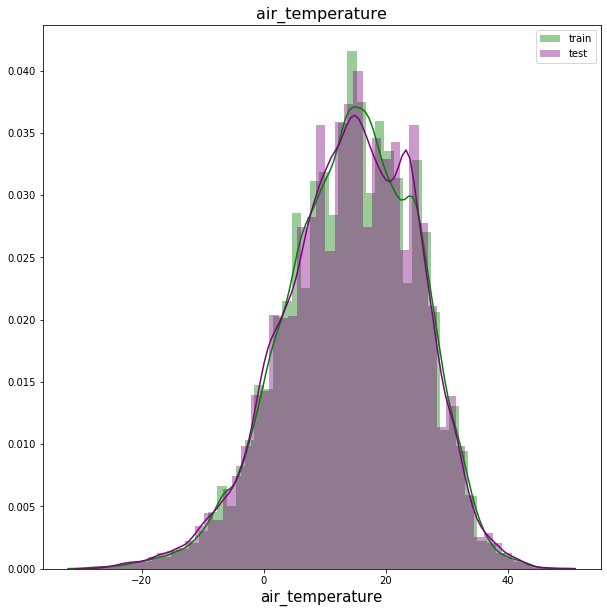

In [16]:
plot_dist_col('air_temperature')

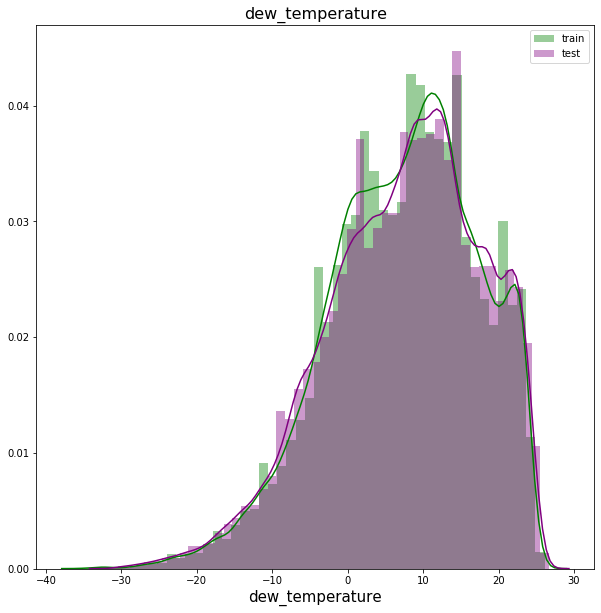

In [17]:
plot_dist_col('dew_temperature')

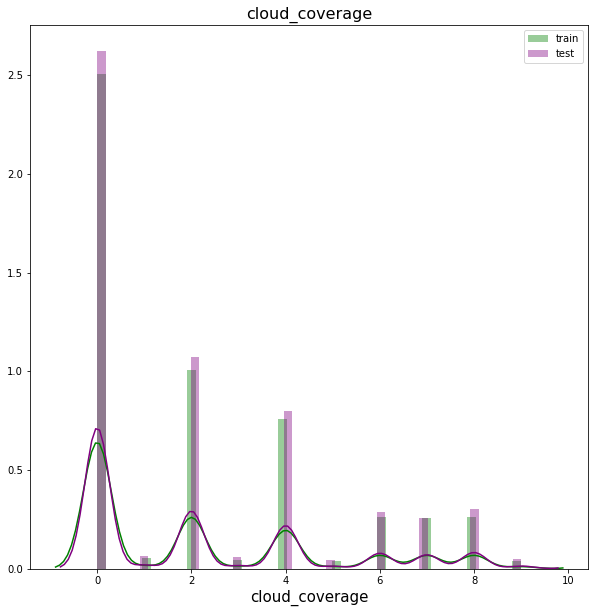

In [18]:
plot_dist_col('cloud_coverage')

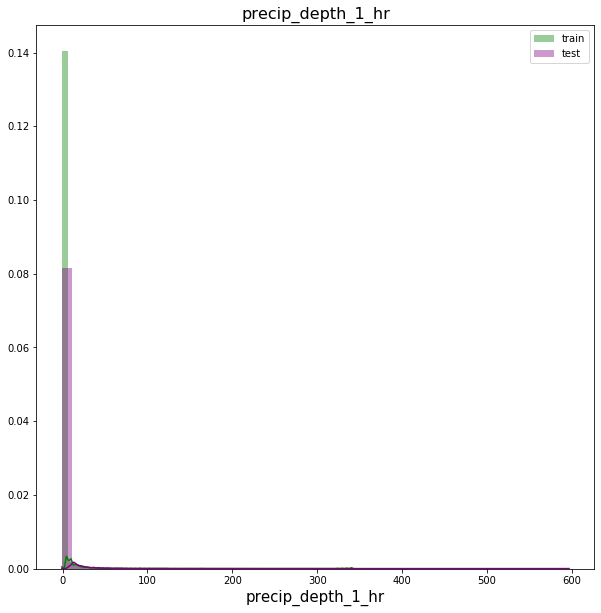

In [19]:
plot_dist_col('precip_depth_1_hr')

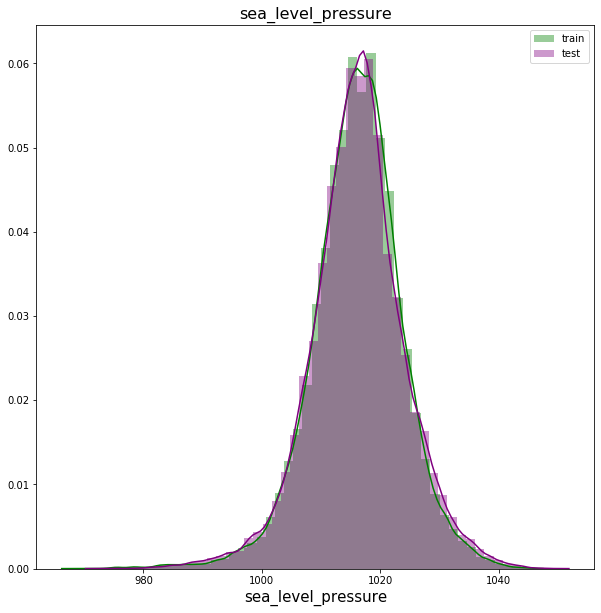

In [20]:
plot_dist_col('sea_level_pressure')

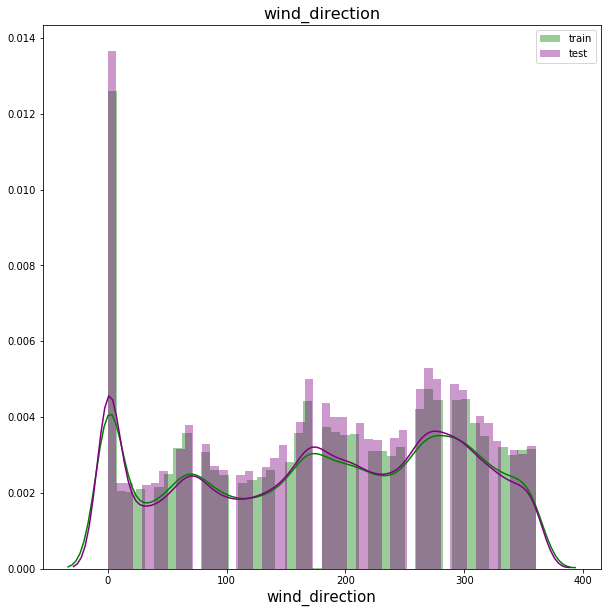

In [21]:
plot_dist_col('wind_direction')

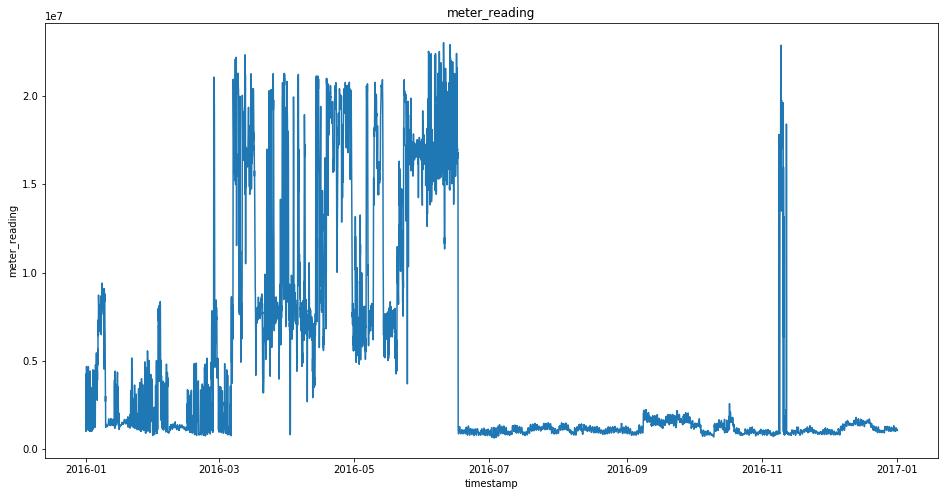

In [22]:
ts=train_df.groupby(["timestamp"])["meter_reading"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('meter_reading')
plt.xlabel('timestamp')
plt.ylabel('meter_reading')
plt.plot(ts)

#### Decomposing into level, trend, seasonality and noise:

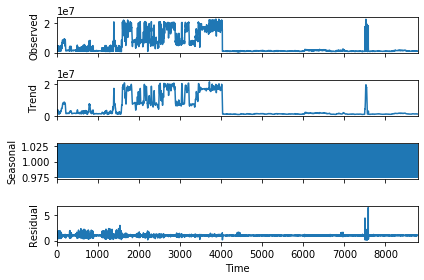

In [23]:
# multiplicative
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
fig = res.plot()

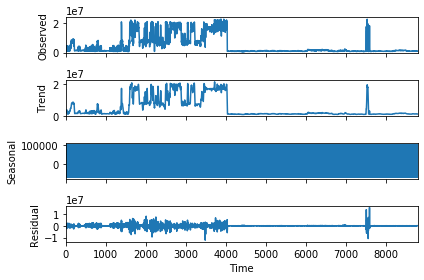

In [24]:
# Additive model
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="additive")
fig = res.plot()